In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1 & 2 Helper Functions

In [51]:
def makeDataQuadratic(myseed):
    np.random.seed(myseed)   #dont forget to import numpy as np
    #y = np.zeros(shape = 100) #100  0-1 normal floats
    x = np.random.normal(size=100) #100  0-1 normal floats
    y = 2*(x**2)+np.random.normal(size = 100)
    df = pd.DataFrame({'x':x, 'y':y}) #dont forget to import pandas as pd
    return(df) 

def polyDesignMatrix(x, p):
    x = np.array(x)  # dont forget to import numpy as np
    X = np.transpose(np.vstack((x**(k+1) for k in range(p+1))))
    return(X)

# Step 3: Generate Design Matrix of order 3

In [52]:
myseed = 1
modelOrder = 3
df = makeDataQuadratic(myseed)

polyX = polyDesignMatrix(df['x'],modelOrder)

# Step 4: Create train and validations sets

In [53]:

trainX, valX, trainy, valy = train_test_split(polyX, df['y'], test_size=0.5, random_state=42)

# Step 5: Create Grid of Alphas 

In [54]:
minalpha = -3
maxalpha = 10
alphagrid = np.logspace(minalpha,maxalpha,num=50)

# Step 6: Create ridge regression model and display coefficients

In [55]:
ridgeCoeffs = np.zeros((len(alphagrid),modelOrder+1))
ridgeMSEs = np.zeros(len(alphagrid))


i = 0
for i, myalpha in enumerate(alphagrid):
    mymodelR = linear_model.Ridge(alpha = myalpha, fit_intercept=False)
    mymodelR.fit(trainX,trainy)
    preds = mymodelR.predict(valX)
    ridgeMSEs[i] = mean_squared_error(preds,valy)
    ridgeCoeffs[i,:] = mymodelR.coef_
    

print()
print(ridgeCoeffs)
print(ridgeMSEs)




[[ -2.72149835e-01   1.87486052e+00   1.58795792e-01   7.41921059e-02]
 [ -2.72105001e-01   1.87473741e+00   1.58782960e-01   7.42248835e-02]
 [ -2.72022439e-01   1.87451069e+00   1.58759332e-01   7.42852491e-02]
 [ -2.71870442e-01   1.87409320e+00   1.58715833e-01   7.43964031e-02]
 [ -2.71590754e-01   1.87332471e+00   1.58635798e-01   7.46010079e-02]
 [ -2.71076564e-01   1.87191094e+00   1.58488677e-01   7.49774013e-02]
 [ -2.70132821e-01   1.86931293e+00   1.58218720e-01   7.56690424e-02]
 [ -2.68405945e-01   1.86454831e+00   1.57724977e-01   7.69373506e-02]
 [ -2.65263646e-01   1.85584242e+00   1.56827306e-01   7.92543707e-02]
 [ -2.59603624e-01   1.84004168e+00   1.55212933e-01   8.34582172e-02]
 [ -2.49594340e-01   1.81171058e+00   1.52366352e-01   9.09911299e-02]
 [ -2.32464275e-01   1.76199889e+00   1.47520956e-01   1.04193839e-01]
 [ -2.04768805e-01   1.67797784e+00   1.39765983e-01   1.26462100e-01]
 [ -1.64033018e-01   1.54450927e+00   1.28576880e-01   1.61700572e-01]
 [ -1

# Step 7:  Plot coefficencts of ridge model as function of alphas

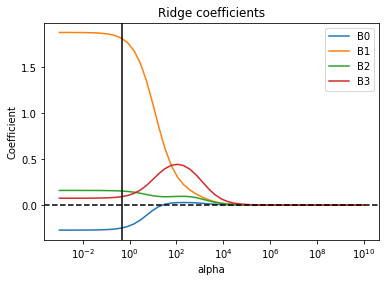

In [56]:
minRidgeMSEindeces = np.argmin(ridgeMSEs)
minRidgeMSE = ridgeMSEs[minRidgeMSEindeces]
minRidgeAlpha = alphagrid[minRidgeMSEindeces]

plt.figure()
plt.semilogx(alphagrid,ridgeCoeffs[:,0:modelOrder+1])
#plt.loglog(alphagrid,np.abs(ridgeCoeffs[:,0:modelOrder+1]))
plt.legend(["B0","B1","B2","B3"])
plt.title("Ridge coefficients")
plt.axhline(linestyle = '--', color='k')
plt.axvline(x=minRidgeAlpha, color='k')
plt.xlabel('alpha')
plt.ylabel('Coefficient')
plt.show()



# Step 8:  For Ridge, plot alphs vs. MSE on predictions of the validation set

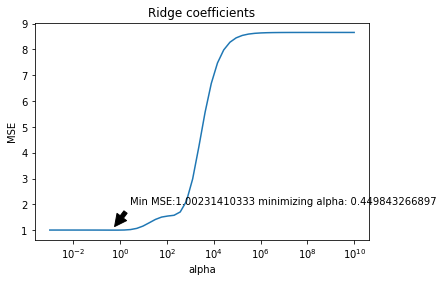

In [57]:



plt.figure()
plt.semilogx(alphagrid,ridgeMSEs[:])
#plt.legend(["MSE"])
plt.title("Ridge coefficients")
plt.annotate('Min MSE:'+ str(minRidgeMSE) + ' minimizing alpha: '+ str(minRidgeAlpha) ,
            xy=(minRidgeAlpha, minRidgeMSE), xycoords='data',
            xytext=(1.2, 0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.15),
            horizontalalignment='right', verticalalignment='top')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

# Step 9: Create LASSO regression model and display coefficients

In [58]:
lassoCoeffs = np.zeros((len(alphagrid),modelOrder+1))
lassoMSEs = np.zeros(len(alphagrid))

i = 0
for i, myalpha in enumerate(alphagrid):
    mymodelL = linear_model.Lasso(alpha = myalpha, fit_intercept=False)
    mymodelL.fit(trainX,trainy)
    preds = mymodelL.predict(valX)
    lassoMSEs[i] = mean_squared_error(preds,valy)
    lassoCoeffs[i,:] = mymodelL.coef_

print()
print(lassoCoeffs)
print(lassoMSEs)


[[-0.26720267  1.87202531  0.15712795  0.07496331]
 [-0.26227117  1.8688994   0.15544955  0.07582277]
 [-0.25318699  1.86314125  0.15235781  0.07740595]
 [-0.23645329  1.85253433  0.14666261  0.08032229]
 [-0.20563013  1.83299724  0.1361722   0.08569394]
 [-0.14885971  1.79701725  0.11685106  0.09558641]
 [-0.04428155  1.73073624  0.08125905  0.11381   ]
 [-0.          1.6357564   0.06307056  0.13888737]
 [-0.          1.47471272  0.05561247  0.18067724]
 [ 0.          1.17811843  0.04187635  0.25764075]
 [ 0.          0.63167879  0.01657004  0.39943829]
 [ 0.          0.          0.          0.55379706]
 [ 0.          0.          0.          0.52106791]
 [ 0.          0.          0.          0.46077853]
 [ 0.          0.          0.          0.34972127]
 [ 0.          0.          0.          0.14514604]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0. 

# Step 10:  Plot coefficients of LASSO as a function of alpha value & describe coefficients behavior

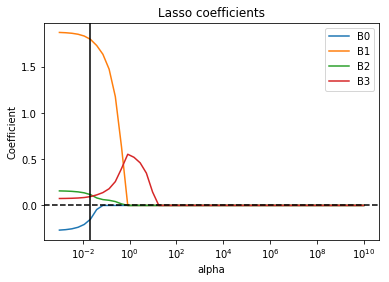

In [59]:
minlassoMSEindeces = np.argmin(lassoMSEs)
minlassoMSE = lassoMSEs[minlassoMSEindeces]
minlassoAlpha = alphagrid[minlassoMSEindeces]


plt.figure()
plt.semilogx(alphagrid,lassoCoeffs[:,0:modelOrder+1])
plt.legend(["B0","B1","B2","B3"])
plt.title("Lasso coefficients")
plt.axhline(linestyle = '--', color='k')
plt.axvline(x=minlassoAlpha, color='k')
plt.xlabel('alpha')
plt.ylabel('Coefficient')
plt.show()

# Step 11:  For LASSO, plot alphas vs. MSE on predictions of the validation set

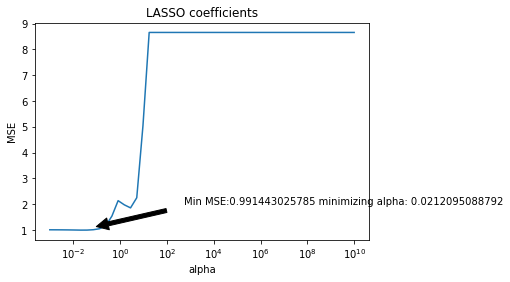

In [60]:


plt.figure()
plt.semilogx(alphagrid,lassoMSEs[:])
#plt.legend(["MSE"])
plt.title("LASSO coefficients")
plt.annotate('Min MSE:'+ str(minlassoMSE) + ' minimizing alpha: '+ str(minlassoAlpha) ,
            xy=(minlassoAlpha, minlassoMSE), xycoords='data',
            xytext=(1.4, 0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.15),
            horizontalalignment='right', verticalalignment='top')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

# Step 12:  Use validation set to determine best ridge and lasso values for data

In [61]:
if minRidgeMSE < minlassoMSE:
    print("Ridge Model is the best model - at alpha ", minRidgeAlpha, " MSE = ", minRidgeMSE)
else:
    print("LASSO Model is the best model - at alpha ", minlassoAlpha, " MSE = ", minlassoMSE)
    
    


LASSO Model is the best model - at alpha  0.0212095088792  MSE =  0.991443025785
